In [22]:
import numpy as np
import sep

In [23]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [32]:
# read image into standard 2-d numpy array
# data = fitsio.read("../data/image.fits")
fits_image_filename = fits.util.get_testdata_filepath("UDFf105w.fits")

data = fits.open(fits_image_filename)

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org/io/fits/tests/data/UDFf105w.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data/io/fits/tests/data/UDFf105w.fits': <HTTPError 404: 'Not Found'>}>

In [ ]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [8]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

NameError: name 'data' is not defined

In [9]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

NameError: name 'bkg' is not defined

In [10]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

NameError: name 'bkg' is not defined

In [11]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

NameError: name 'bkg_image' is not defined

In [12]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

NameError: name 'bkg' is not defined

In [13]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

NameError: name 'bkg_rms' is not defined

In [14]:
# subtract the background
data_sub = data - bkg

NameError: name 'data' is not defined

In [15]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

NameError: name 'data_sub' is not defined

In [16]:
# how many objects were detected
len(objects)

NameError: name 'objects' is not defined

NameError: name 'data_sub' is not defined

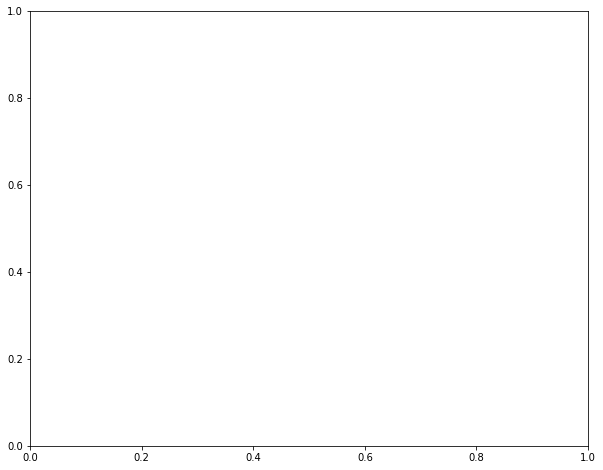

In [17]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [18]:
# available fields
objects.dtype.names

NameError: name 'objects' is not defined

In [19]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

NameError: name 'data_sub' is not defined

In [20]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

NameError: name 'flux' is not defined